In [20]:
#imports
import pandas as pd
import numpy as np
import os
import csv


from matplotlib.colors import Normalize
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
#storing all data in dataframe
meteorite_df = pd.read_csv("meteorite_data.csv")
meteorite_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN,NaN


In [3]:
#listing column names
meteorite_df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation', 'States', 'Counties'],
      dtype='object')

In [4]:
#check for duplicates
meteorite_df[meteorite_df.duplicated()]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties


In [5]:
#checking data types
meteorite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  States       1659 non-null   float64
 11  Counties     1659 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.2+ MB


In [6]:
#creating new dataframe containing relevant columns
meteorite_df2 = meteorite_df[["name","recclass","mass (g)", "fall", "year", "reclat", "reclong" ]]
meteorite_df2.head()

,name,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [7]:
#removing null values
meteorite_df2 = meteorite_df2.dropna()
meteorite_df2

,name,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...
45711,Zillah 002,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45712,Zinder,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667
45713,Zlin,H4,3.3,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,L6,2167.0,Found,2003.0,49.78917,41.50460


In [22]:
#changing year datatype to remove decimal
meteorite_df2['year'] = meteorite_df2['year'].astype(int)
meteorite_df2.head()


,name,class,mass,fall,year,latitude,longitude
0,Aachen,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,L6,780.0,Fell,1902,-33.16667,-64.95000


In [11]:
#renaming columns for clarity
meteorite_df2 = meteorite_df2.rename(columns={"recclass":"class","reclat":"latitude","reclong":"longitude",
                                              "mass (g)": "mass"})
meteorite_df2.head()


,name,class,mass,fall,year,latitude,longitude
0,Aachen,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,L6,780.0,Fell,1902,-33.16667,-64.95000


In [24]:
#creating csv for cleaned data
meteorite_csv = meteorite_df2.to_csv("clean_meteorite_data.csv")

In [12]:
#creating new dataframe for mass
mass_df = meteorite_df2.loc[:, ["name","class", "mass"]]
mass_df.head()

,name,class,mass
0,Aachen,L5,21.0
1,Aarhus,H6,720.0
2,Abee,EH4,107000.0
3,Acapulco,Acapulcoite,1914.0
4,Achiras,L6,780.0


In [13]:
#sorting df by mass
sorted_mass_df = mass_df.sort_values(by='mass', ascending=False)
sorted_mass_df.head()

,name,class,mass
16392,Hoba,"Iron, IVB",60000000.0
5373,Cape York,"Iron, IIIAB",58200000.0
5365,Campo del Cielo,"Iron, IAB-MG",50000000.0
5370,Canyon Diablo,"Iron, IAB-MG",30000000.0
3455,Armanty,"Iron, IIIE",28000000.0


In [14]:
#finding average of mass per type
avg_mass = mass_df.groupby("class")
avg_mass["mass"].mean()

class
Acapulcoite               206.297784
Acapulcoite/Lodranite      25.352000
Acapulcoite/lodranite       3.500000
Achondrite-prim           747.666667
Achondrite-ung            728.538889
                            ...     
Stone-ung                   0.630000
Ureilite                  518.336776
Ureilite-an              1327.900000
Ureilite-pmict            306.461111
Winonaite                1486.335000
Name: mass, Length: 422, dtype: float64

C:\Users\eholt\AppData\Local\Temp\ipykernel_6592\2768681610.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='cool', norm=norm), orientation='vertical')


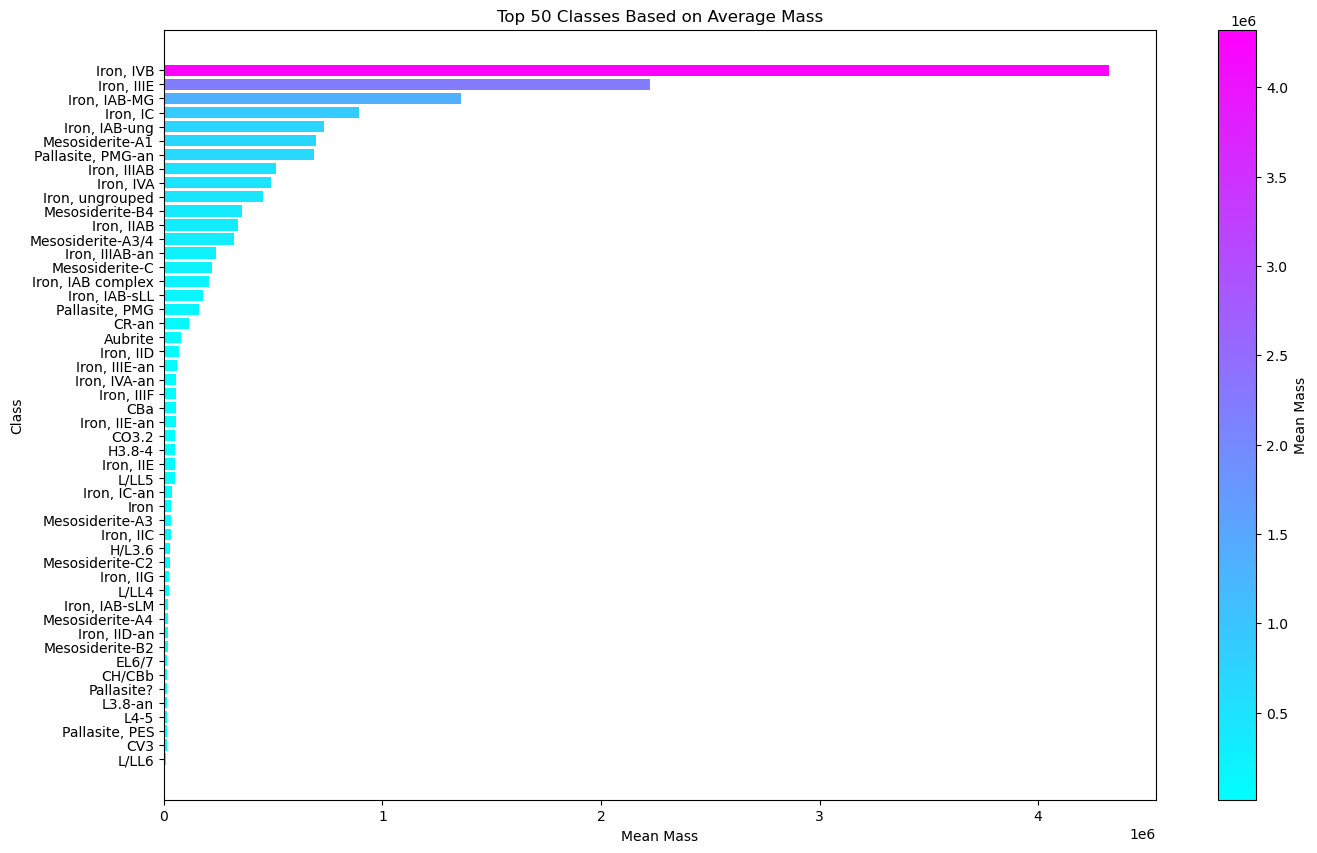

In [15]:
#graph for average mass for the top 50 heaviest classes
class_mean_mass = mass_df.groupby('class')['mass'].mean().reset_index()
top_50_classes = class_mean_mass.nlargest(50, 'mass')

plt.figure(figsize=(16, 10))  
norm = Normalize(vmin=top_50_classes['mass'].min(), vmax=top_50_classes['mass'].max())
colors = plt.cm.cool(norm(top_50_classes['mass']))


bars = plt.barh(top_50_classes['class'], top_50_classes['mass'], color=colors)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='cool', norm=norm), orientation='vertical')
cbar.set_label('Mean Mass')

plt.xlabel('Mean Mass')
plt.ylabel('Class')
plt.title('Top 50 Classes Based on Average Mass')

plt.gca().invert_yaxis()
plt.show()

In [16]:
#finding counts for total meteorites found vs fell
fall_count = meteorite_df2.groupby("fall")
fall_count["name"].count()

fall
Fell      1065
Found    37050
Name: name, dtype: int64

In [17]:
#creating year dataframe
years_df = meteorite_df2.loc[:, ["year"]]
years_df

,year
0,1880
1,1951
2,1952
3,1976
4,1902
...,...
45711,1990
45712,1999
45713,1939
45714,2003


In [18]:
#finding counts for meteorites per year
year_count = meteorite_df2.groupby("year")
year_count = year_count["name"].count()
year_count = year_count.sort_index()
year_count

year
860        1
1399       1
1490       1
1491       1
1575       1
        ... 
2010    1005
2011     713
2012     234
2013      11
2101       1
Name: name, Length: 253, dtype: int64

In [19]:
#changing entry year 2101 to 2000
meteorite_df2['year'] = meteorite_df2['year'].replace(2101, 2000)
year_count["name"].count()

KeyError: 'name'

In [ ]:
#graph for yearly count of meteorites fallen
x_axis = year_count.index
y_axis = year_count

plt.plot(x_axis,y_axis)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts of Meteorites Fallen between 1960 and 2013')
plt.xlim(1960,2015)

plt.tight_layout()
#fig.savefig("/Images/yearly_landings_graph.png")
plt.show()